### In this notebook I utilize the Random Forest Classifier algorithms to predict whether a certain mushroom is edible or poisonous based on specific attributes, including the shape and color of the cap, the color of the gills, and more.

In [ ]:
import pandas as pd
# Reading the dataset 'mushroom_train'
url = "https://drive.google.com/file/d/1vaAYYMviUWXdxSrsNZ3GQns0yCjw4WxY/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
mushroom_dataset = pd.read_csv(path)

In [ ]:
# Reading the dataset 'mushroom_test'
url = "https://drive.google.com/file/d/1xww57RBy76epQ1wMLlaRAOK0_U80xWil/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
mushroom_test = pd.read_csv(path)

In [ ]:
test_ids = mushroom_test['Id']

In [ ]:
mushroom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               6499 non-null   object
 1   cap.color               6499 non-null   object
 2   bruises                 6499 non-null   bool  
 3   stalk.color.above.ring  6499 non-null   object
 4   stalk.color.below.ring  6499 non-null   object
 5   population              6499 non-null   object
 6   Id                      6499 non-null   int64 
 7   poisonous               6499 non-null   int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 361.9+ KB


In [ ]:
mushroom_dataset.head()

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,0,w,w,v,6573,1
1,f,e,1,p,w,y,4426,0
2,b,w,0,w,w,s,7018,0
3,k,g,0,w,w,n,5789,0
4,f,n,1,p,g,v,6187,0


In [ ]:
# Encoding and splitting the training dataset
from sklearn.model_selection import train_test_split

mushroom_dataset['bruises'] = mushroom_dataset['bruises'].astype(int)

# Encode categorical features using one-hot encoding
categorical_features = ['cap.shape', 'cap.color', 'stalk.color.above.ring', 'stalk.color.below.ring', 'population']
mush_encoded = pd.get_dummies(mushroom_dataset, columns=categorical_features, drop_first=True)

# Train test split
X = mush_encoded.drop(['Id', 'poisonous'], axis=1)
y = mush_encoded['poisonous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Encoding the test dataset
from sklearn.model_selection import train_test_split

mushroom_test['bruises'] = mushroom_test['bruises'].astype(int)

# Encode categorical features using one-hot encoding
categorical_features = ['cap.shape', 'cap.color', 'stalk.color.above.ring', 'stalk.color.below.ring', 'population']
mush_encoded_test = pd.get_dummies(mushroom_test, columns=categorical_features, drop_first=True)

mush_encoded_test = mush_encoded_test.drop(['Id'], axis=1)

In [ ]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline
rf_pipeline = make_pipeline(RandomForestClassifier())

# Define the hyperparameters grid to search
param_grid = {
    "randomforestclassifier__n_estimators": [100, 200, 300],  # Number of trees
    "randomforestclassifier__max_depth": [None, 10, 20, 30],  # Maximum depth of trees
    "randomforestclassifier__min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],  # Minimum samples required in a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring="precision")# Precision is particularly useful when the cost of false positives is high (here saving people is more important than the overall accuracy of model).
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='precision')

In [ ]:
# Best hyperparameters
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)


Best Hyperparameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}


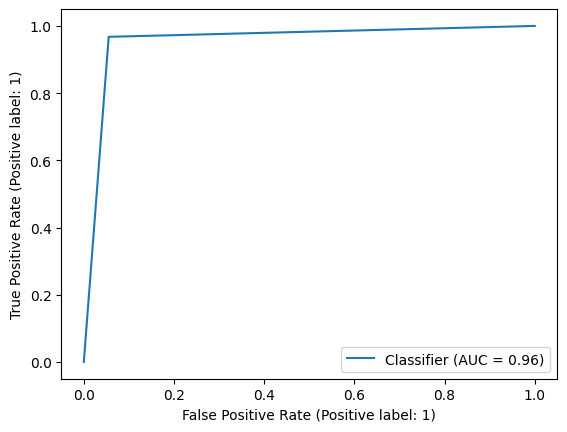

In [ ]:
# Change probability threshold
import matplotlib.pyplot as plt

y_probabilities = grid_search.predict_proba(mush_encoded_test)[:, 1]  # Probabilities for class 1 (positive class)

# Best threshold
chosen_threshold = 0.15
y_pred = (y_probabilities >= chosen_threshold).astype(int) # y_pred is the result

# Plot ROC
from sklearn.metrics import RocCurveDisplay
y_pred_test = grid_search.predict(X_test)
RocCurveDisplay.from_predictions( y_test, y_pred_test)

plt.show()

In [ ]:
# Create a DataFrame using pandas to store the predection results
results = pd.DataFrame({
    'Id': test_ids,
    'poisonous': y_pred
})


In [ ]:
# Save the prediction 'results' DataFrame as a CSV file
from google.colab import files

results.to_csv('RF_prediction.csv', index=False)
files.download('RF_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>